## Calculating the Beta of a Stock

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Load the data for Microsoft and S&P 500 for the period 1st of January 2012 – 31st of December 2016. 

In [10]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override()
data = pd.read_csv('CAPM_Exercise_data.csv', index_col= 'Date')
data

,MSFT,^GSPC
Date,,
2012-01-03,23.031868,1277.060059
2012-01-04,23.573898,1277.300049
2012-01-05,23.814798,1281.060059
2012-01-06,24.184755,1277.810059
2012-01-09,23.866419,1280.699951
...,...,...
2016-12-23,62.500671,2263.790039
2016-12-27,62.540195,2268.879883
2016-12-28,62.253590,2249.919922


Let S&P 500 act as the market. 

*****

Calculate the beta of Microsoft.

In [3]:
sec_returns = np.log(data / data.shift(1))

In [4]:
cov = sec_returns.cov() * 250
cov

,MSFT,^GSPC
MSFT,0.053781,0.018208
^GSPC,0.018208,0.016361


In [5]:
cov_with_market =cov.iloc[0, 1]
cov_with_market

0.018208431910398934

In [6]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.01636059269926906

** Beta: **
### $$ 
\beta_{pg} = \frac{\sigma_{pg,m}}{\sigma_{m}^2}
$$

In [50]:
MSFT_beta = cov_with_market / market_var
MSFT_beta

0.8823410935875207

In [60]:
ativos = ['ITSA4.SA', '^BVSP']

data_inicial = '2018-01-01'
data_final = '2024-01-01'

tabela_cotacoes = pdr.get_data_yahoo(ativos,data_inicial, data_final)['Adj Close'];

display(tabela_cotacoes);

[*********************100%%**********************]  2 of 2 completed


Ticker,ITSA4.SA,^BVSP
Date,,
2018-01-02,5.600279,77891.0
2018-01-03,5.666286,77995.0
2018-01-04,5.772909,78647.0
2018-01-05,5.783064,79071.0
2018-01-08,5.777986,79379.0
...,...,...
2023-12-21,9.730434,132182.0
2023-12-22,9.874946,132753.0
2023-12-26,9.903847,133533.0


In [52]:
#tabela_cotacoes_normalizada = (tabela_cotacoes / tabela_cotacoes.iloc[0])

#display(tabela_cotacoes_normalizada)


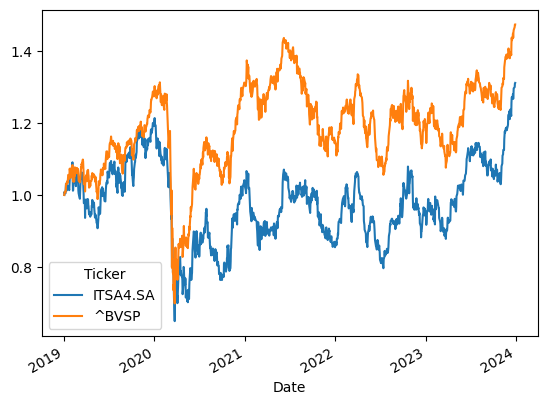

In [61]:
tabela_cotacoes_normalizada.plot();

In [62]:
tabela01 = tabela_cotacoes#_normalizada

calculando o BETA

In [63]:
sec_return01 = np.log(tabela01 / tabela01.shift(1))

In [64]:
cov01 = sec_return01.cov() * 250
cov01

Ticker,ITSA4.SA,^BVSP
Ticker,,
ITSA4.SA,0.088341,0.061996
^BVSP,0.061996,0.067062


In [66]:
cov_with_market = cov01.iloc[0, 1]
cov_with_market

0.06199566049325714

In [67]:
market_var = sec_return01['^BVSP'].var() * 250
market_var

0.06706156342750852

###BETA###

In [68]:
itausa_beta = cov_with_market / market_var

itausa_beta

0.9244589199038363

de outra forma

In [90]:
import yfinance as yf
import statsmodels.api as sm
from datetime import timedelta
from datetime import datetime



In [101]:
ativos = ['ITSA4.SA', '^BVSP']
data = datetime.now()
cinco_anos = data - timedelta(days= 1825)

dados_cotacoes = yf.download(tickers= ativos, start= cinco_anos, end= data)['Adj Close'];

dados_cotacoes

[*********************100%%**********************]  2 of 2 completed


Ticker,ITSA4.SA,^BVSP
Date,,
2019-06-03,7.762159,97020.000000
2019-06-04,7.780914,97380.000000
2019-06-05,7.593420,95999.000000
2019-06-06,7.680919,97205.000000
2019-06-07,7.749665,97821.000000
...,...,...
2024-05-24,9.960000,124306.000000
2024-05-27,9.970000,124496.000000
2024-05-28,9.970000,123780.000000


In [102]:
retornos_diarios = dados_cotacoes.pct_change().dropna()

retornos_diarios


Ticker,ITSA4.SA,^BVSP
Date,,
2019-06-04,0.002416,0.003711
2019-06-05,-0.024097,-0.014182
2019-06-06,0.011523,0.012563
2019-06-07,0.008950,0.006337
2019-06-10,-0.015322,-0.003619
...,...,...
2024-05-24,-0.006979,-0.003391
2024-05-27,0.001004,0.001528
2024-05-28,0.000000,-0.005751


###CALCULANDO O BETA

In [103]:
X = retornos_diarios['^BVSP']
Y = retornos_diarios[ativos[0]]
X = sm.add_constant(x)
model = sm.OLS(Y, X).fit()



In [99]:
#BETA
print(model.params[1])
print(model.rsquared)
print("--------------------------------")
print(str(model.summary()))

0.8885483039650786
0.6467018660710318
--------------------------------
                            OLS Regression Results                            
Dep. Variable:               ITSA4.SA   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2268.
Date:                Fri, 31 May 2024   Prob (F-statistic):          3.34e-282
Time:                        12:05:06   Log-Likelihood:                 3864.9
No. Observations:                1241   AIC:                            -7726.
Df Residuals:                    1239   BIC:                            -7716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\Risonaldo\AppData\Local\Temp\ipykernel_10068\2363350320.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.params[1])
